In [13]:
import cv2 # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

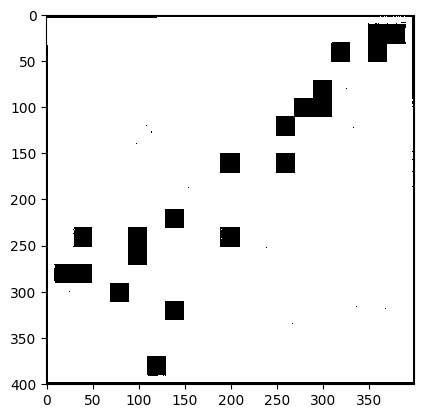

In [14]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)

image_copia = 1.0 * (image > 250)#mudando os valores de cinza para escala de preto e branco

goal = (300, 25) #define o meu objetivo
robo = (80, 325) #define onde ta meu robo

#para visualização inicial, os dois são pretos
image_copia[goal[0]][goal[1]] = 0 #objetivo é 0
image_copia[robo[0]][robo[1]] = 0 #robo é 0

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.show()

In [15]:
#tentativa 3
image_copia[goal[0]][goal[1]] = 2 #objetivo é 2
image_copia[robo[0]][robo[1]] = 1 #robo é 1

soma = 2
ponto = goal
parar = False
coordenadas = list()

while(1):
    soma += 1
    for l in range (-1,2):
        for c in range (-1,2):
           #print(c, l)
            try:
                if(image_copia[ponto[0]+l][ponto[1]+c] == 1):
                    image_copia[ponto[0]+ l][ponto[1]+c]= soma
                    coordenadas.append([ponto[0]+ l, ponto[1]+c])

                if(ponto[0]+l == robo[0] and ponto[1]+c == robo[1]):
                    parar = True
                    break
                #print(ponto[0]+l, ponto[1]+c)
            except: 
                continue
        if(parar == True):
           break   
    if(parar == True):
           break   
            
    ponto = coordenadas.pop(0)

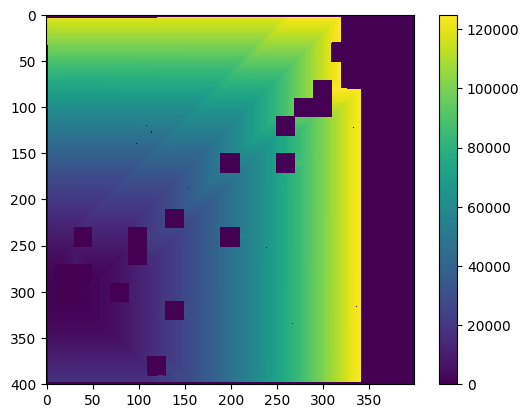

In [16]:
plt.imshow(image_copia, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
plt.colorbar()
plt.show()

In [17]:
ponto_inicial = robo
caminho = [robo]
menor = image_copia[robo[0]][robo[1]] + 1
menor_posicao = robo
parar = False

while(1):

    for l in range (1,-2,-1):
        for c in range (1,-2,-1):
            try:
                if(image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c] > 1 and image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c] < menor):
                    #print("posicao: " , (menor_posicao[0]+l,menor_posicao[1]+c), "menor posicao ", menor_posicao, " valor ", image_copia[menor_posicao[0]+l][menor_posicao[1]+c], "menor valor ", menor)
                    #print(menor)
                    
                    menor = image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c]
                    menor_posicao = (ponto_inicial[0]+l, ponto_inicial[1]+c)

                if(ponto_inicial[0]+l == goal[0] and ponto_inicial[1]+c == goal[1]):
                    parar = True
                    break
                # print(menor_posicao[0]+l, menor_posicao[1]+c)
            except: 
                continue

        if(parar == True):
            break 

    ponto_inicial = menor_posicao
    #print("parou quadrado")
    caminho.append(menor_posicao)

    if(parar == True):
        break 

In [18]:
print(caminho)

[(80, 325), (81, 324), (82, 323), (83, 322), (84, 321), (85, 320), (86, 319), (87, 318), (88, 317), (89, 316), (90, 315), (91, 314), (92, 313), (93, 312), (94, 311), (95, 311), (96, 311), (97, 311), (98, 311), (99, 311), (100, 311), (101, 311), (102, 311), (103, 311), (104, 311), (105, 311), (106, 311), (107, 311), (108, 311), (109, 311), (110, 311), (111, 310), (112, 309), (113, 308), (113, 307), (113, 306), (113, 305), (113, 304), (113, 303), (113, 302), (113, 301), (113, 300), (113, 299), (113, 298), (113, 297), (113, 296), (113, 295), (113, 294), (113, 293), (113, 292), (113, 291), (113, 290), (114, 289), (115, 288), (116, 287), (117, 286), (118, 285), (119, 284), (120, 283), (121, 282), (122, 281), (123, 280), (124, 279), (125, 278), (126, 277), (127, 276), (128, 275), (129, 274), (130, 273), (131, 272), (132, 271), (133, 270), (133, 269), (133, 268), (133, 267), (133, 266), (133, 265), (133, 264), (133, 263), (133, 262), (133, 261), (133, 260), (133, 259), (133, 258), (133, 257),

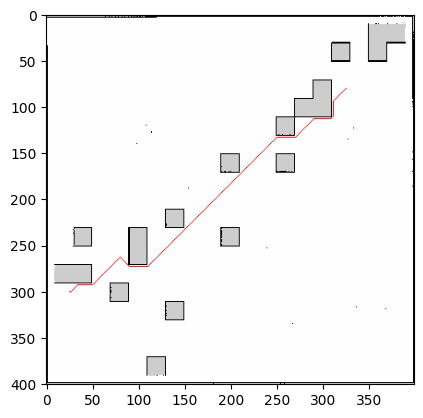

In [19]:
#colorindo caminho :)

image_com_caminho = image.copy()
image_com_caminho = cv2.cvtColor(image_com_caminho, cv2.COLOR_GRAY2RGB)

for i in caminho:

    image_com_caminho[i[0]][i[1]] = [254, 0, 0]

plt.imshow(image_com_caminho)



In [20]:
# image_copia[goal[0]][goal[1]] = 2  #objetivo começa em 2

# numeros = [goal] #lista para armazenar as coordenadas
# valores = [] #lista para armazenas as coordenadas e seus valores

# direcoes = [(-1, 0), (1, 0), (0, -1), (0, 1)] #faz ele ir pra cima

# #função para não acessar valores inexistentes
# def pixel_valido(x,y,image):
#     try: 
#         if(image[x][y] ==1):
#             return True
#         else:
#             return False
#     except:
#         pass

# while(numeros):
#     x, y = numeros.pop(0) #para sempre tirar o elemento da lista e colocar na variável
#     valor_atual = image_copia[x][y]

#     valores.append((x, y, valor_atual))
    
#     for dx, dy in direcoes:
#         new_x, new_y = x + dx, y + dy  # Coordenadas da nova célula
#         if pixel_valido(new_x, new_y, image_copia):  # Verifica se a célula é válida
#             image_copia[new_x][new_y] = valor_atual + 1  # Aumenta o valor
#             numeros.append((new_x, new_y))  # Adiciona a nova célula à fila para processar depois

# plt.imshow(image_copia, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
# plt.colorbar()
# plt.show()


# for item in valores:
#     print(f"Posição: ({item[0]}, {item[1]}), Valor: {item[2]}")

In [21]:
#Essa foi a tentativa 1, falhou porque demora muito e crashar ;)
    #for l in range (-(soma-2),soma-1, 1):
    #    for c in range (-(soma-2),soma-1,1):
    #        #print(c, l)
    #        try:
    #            if(image_copia[goal[0]+l][goal[1]+c] == 1):
    #                image_copia[goal[0]+ l][goal[1]+c]= soma
    #            if(goal[0]+l == robo[0] and goal[1]+c == robo[1]):
    #                break
    #            print(goal[0]+l, goal[1]+c)
    #        except: 
    #            continue

In [22]:
image_copia.shape

(401, 399)

In [23]:
#tentativa dois, também deu errado porque ele faz um quadrado, e não necessáriamente sempre vai ser um quadrado 
# while(1):
#     soma += 1
#     for c in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+(-(soma-2))][goal[1]+c] == 1):
#                 image_copia[goal[0]+ (-(soma-2))][goal[1]+c]= soma
#             if(goal[0]+(-(soma-2)) == robo[0] and goal[1]+c == robo[1]):
#                 print(goal[0]+(soma-1), goal[1]+c)
#                 parar = True
#                 break
#         except: 
#             pass

#     for c in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+(soma-1)][goal[1]+c] == 1):
#                 image_copia[goal[0]+ (soma-1)][goal[1]+c]= soma
#             if(goal[0]+(soma-1) == robo[0] and goal[1]+c == robo[1]):
#                 print(goal[0]+(soma-1), goal[1]+c)
#                 parar = True
#                 break
#         except: 
#             pass
    
#     for l in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+l][goal[1]+(-(soma-2))] == 1):
#                 image_copia[goal[0]+ l][goal[1]+(-(soma-2))]= soma
#             if(goal[0]+l == robo[0] and goal[1]+(-(soma-2)) == robo[1]):
#                 print(goal[0]+l, goal[1]+(-(soma-2)))
#                 parar = True
#                 break
            
#         except: 
#             pass

#     for l in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+l][goal[1]+(soma-1)] == 1):
#                 image_copia[goal[0]+ l][goal[1]+(soma-1)]= soma
#             if(goal[0]+l == robo[0] and goal[1]+(soma-1) == robo[1]):
#                 print(goal[0]+l, goal[1]+(soma-1))
#                 parar = True
#                 break
            
#         except: 
#             pass

#     if parar:
#         break

(401, 399, 3)

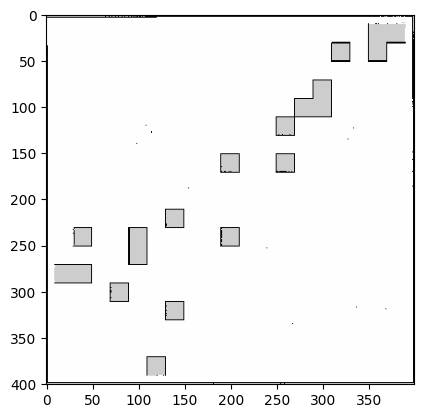

In [24]:
#teste de outra biblioteca
img = cv2.imread("my_map.pgm")
plt.imshow(img)
img.shape